# Praca domowa nr 7

In [72]:
import pandas as pd
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, precision_score, recall_score, f1_score

## Wczytanie danych

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_val = pd.read_csv('val.csv')

## Dobór odpowiedniej liczby klastrów i typu kowariancji

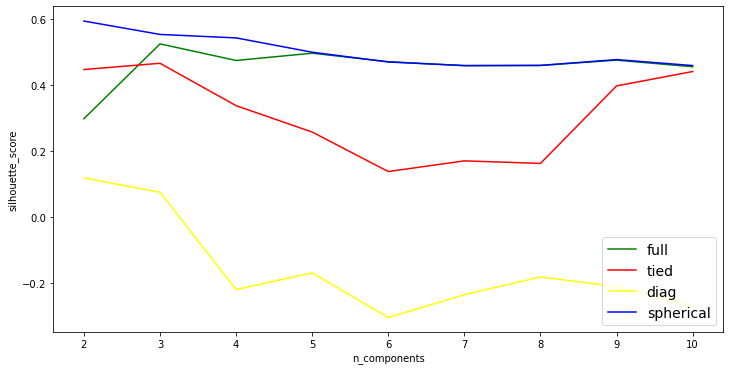

In [44]:
plt.figure(figsize=(12, 6))

for cov_type, col in zip(['full', 'tied', 'diag', 'spherical'],
                        ['green', 'red', 'yellow', 'blue']):
    score_vec = [0]*9
    
    for n in range(2, 11):

        gmm = mixture.GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
        gmm.fit(df_train)
        score_vec[n-2] = silhouette_score(df_train, gmm.predict(df_train))
        
    plt.plot(range(2, 11), score_vec, color=col, label=cov_type)
    
plt.xlabel('n_components')
plt.ylabel('silhouette_score')
plt.legend(loc='lower right', fontsize=14)
plt.show()

Biorąc pod uwagę metrykę silhouette wybieramy n_components=2 oraz typ kowariancji 'spherical'

In [45]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='spherical')
gmm.fit(df_train);

GaussianMixture(covariance_type='spherical', n_components=2)

## Wykrywanie outlierów i zastosowanie metryk 

Wyznaczymy treshold, korzystając z wiedzy, że w zbiorze treningowym nie mamy outlierów.

In [53]:
score = gmm.score_samples(df_train)
treshold = min(score), max(score)
treshold

(-113.16803686762148, -51.665256993936396)

In [62]:
y = df_test.iloc[:, 0]
X = df_test.iloc[:, 1:]

In [69]:
outliers = []
for score in gmm.score_samples(X):
    i = 0 if treshold[0] <= score <= treshold[1] else 1
    outliers.append(i)

Dla porównania możemy wyświetlić prawdziwe informacje, czy dany rekord był outlierem, jednocześnie pokazując uzyskane za pomocą GMM.

In [75]:
print(list(y))
print(outliers)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]


Widzimy, że jedynie w jednym przypadku uzyskane wartości się nie zgadzają. Pozostaje wyznaczyć metryki.

In [76]:
print(f'Precision score: {precision_score(y, outliers)}')
print(f'Recall score: {recall_score(y, outliers)}')
print(f'F1 score: {f1_score(y, outliers)}')

Precision score: 1.0
Recall score: 0.8
F1 score: 0.888888888888889


## Podsumowanie

Dostaliśmy wysokie wartości zastosowanych metryk, skąd nasuwa się wniosek, że algorytm GMM może być stosowany do wykrywania wartości odstających.